In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Model
from keras.layers import Dense,Embedding,Input
from keras.layers import LSTM,GlobalMaxPool1D,Dropout
from keras.preprocessing import text,sequence

Using TensorFlow backend.


In [3]:
training_data=pd.read_csv('data/jigsaw-toxic-comment-classification/train.csv')
testing_data=pd.read_csv('data/jigsaw-toxic-comment-classification/test.csv')

In [4]:
categories= ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = training_data[categories].values
list_sentences_train = training_data["comment_text"]
list_sentences_test = testing_data["comment_text"]

In [5]:
max_features = 20000
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

(array([21439., 27127., 22176., 16223., 12859., 10062.,  7586.,  5991.,
         4731.,  3914.,  3129.,  2820.,  2306.,  1896.,  1647.,  1455.,
         1329.,  1287.,  1013.,   857.,   750.,   799.,   528.,   581.,
          486.,   437.,   407.,   373.,   386.,   292.,   284.,   242.,
          217.,   169.,   156.,   167.,   158.,   133.,   144.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390]),
 <a list of 39 Patch objects>)

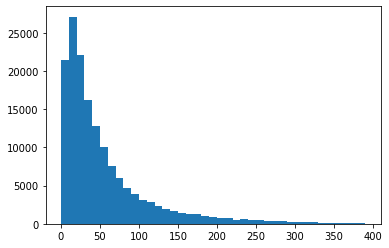

In [11]:
totalNumWords=[len(one_comment) for one_comment in list_tokenized_train]
plt.hist(totalNumWords,bins=np.arange(0,400,10))

In [12]:
maxlen = 200
X_t = sequence.pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = sequence.pad_sequences(list_tokenized_test, maxlen=maxlen)

In [13]:
max_features=20000
maxlen=200
embed_size = 128
inp = Input(shape=(maxlen, ))
x = Embedding(max_features, embed_size)(inp)
x = LSTM(50, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 200, 50)           35800     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
__________

In [15]:
model.fit(X_t,y, batch_size=32, epochs=2, validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/2
143613/143613 [==============================] - 2915s 20ms/step - loss: 0.0732 - acc: 0.9767 - val_loss: 0.0489 - val_acc: 0.9821
Epoch 2/2
143613/143613 [==============================] - 3091s 22ms/step - loss: 0.0452 - acc: 0.9833 - val_loss: 0.0472 - val_acc: 0.9825


In [16]:
model.save('data/model_toxic.h5')

In [5]:
from keras.models import load_model

In [6]:
model=load_model('data/model_toxic.h5')

W0601 15:31:49.774162 27828 deprecation_wrapper.py:119] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0601 15:31:49.979593 27828 deprecation_wrapper.py:119] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0601 15:31:49.995032 27828 deprecation_wrapper.py:119] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0601 15:31:50.393839 27828 deprecation_wrapper.py:119] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.place

In [13]:
y_test=model.predict(X_te)

In [15]:
sample_submission=pd.read_csv('data/jigsaw-toxic-comment-classification/sample_submission/sample_submission.csv')

In [16]:
sample_submission[categories]=y_test

In [17]:
sample_submission.to_csv('results.csv',index=False)

In [19]:
results=pd.read_csv('results.csv')

In [20]:
print(results[:10])

                 id     toxic  severe_toxic   obscene        threat    insult  \
0  00001cee341fdb12  0.992038  2.782994e-01  0.947067  5.328512e-02  0.830892   
1  0000247867823ef7  0.000988  9.238720e-07  0.000186  2.264977e-06  0.000096   
2  00013b17ad220c46  0.002257  4.827976e-06  0.000485  1.069903e-05  0.000284   
3  00017563c3f7919a  0.001360  2.980232e-07  0.000125  8.642673e-07  0.000085   
4  00017695ad8997eb  0.004774  1.308322e-05  0.000877  3.138185e-05  0.000565   
5  0001ea8717f6de06  0.002584  2.145767e-06  0.000335  7.033348e-06  0.000251   
6  00024115d4cbde0f  0.001203  2.682209e-07  0.000104  9.238720e-07  0.000074   
7  000247e83dcc1211  0.301450  3.446877e-03  0.040251  9.430677e-03  0.066673   
8  00025358d4737918  0.106658  3.030896e-05  0.008887  1.088083e-04  0.011362   
9  00026d1092fe71cc  0.000350  1.192093e-07  0.000046  1.788139e-07  0.000022   

   identity_hate  
0       0.204457  
1       0.000019  
2       0.000056  
3       0.000013  
4       0.000